#1. Data Ingestion

In [49]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [50]:
# Load dataset
df = pd.read_csv("tvmarketing.csv")

In [51]:
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


#2. EDA (Exploratory Data Analysis)

In [52]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [53]:
df.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [54]:
df.sample()

,TV,Sales
189,18.7,6.7


In [55]:
df.isna().sum()

,0
TV,0
Sales,0


In [56]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


#3. Visualization

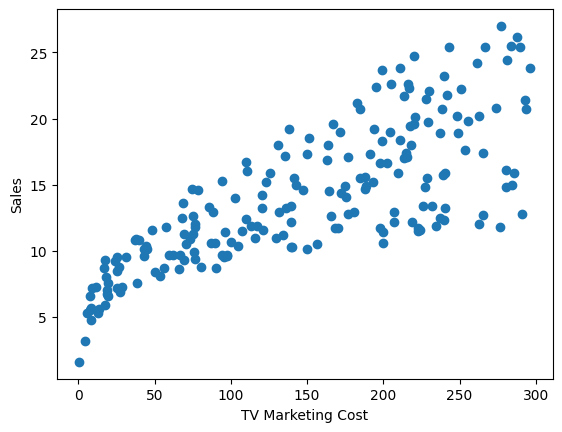

In [57]:
# Scatter plot (visualizing relationship)
plt.scatter(df.TV, df.Sales)
plt.xlabel("TV Marketing Cost")
plt.ylabel("Sales")

plt.show()

#4. Feature / Target Split

In [58]:
# Feature (X) and Target (y) split
X = df[["TV"]]
y = df["Sales"]

In [59]:
X

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [60]:
y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


#5. Train–Test Split

In [61]:
# Train-test split (75% train, 25% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [62]:
X_train.shape, X_test.shape

((150, 1), (50, 1))

#6. Model Building

In [89]:
# Build Linear Regression Model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

In [64]:
regressor

LinearRegression()

In [65]:
regressor.fit(X_train, y_train)

LinearRegression()

In [87]:
# Coefficients (slope) and intercept
print(regressor.coef_)

[0.04802945]


In [88]:
print(regressor.intercept_)

6.9119726188687185


In [68]:
X_test

,TV
58,210.8
40,202.5
34,95.7
102,280.2
184,253.8
198,283.6
95,163.3
4,180.8
29,70.6
168,215.4


In [69]:
# Predictions on test data
y_pred = regressor.predict(X_test)

In [70]:
y_pred

array([17.03658069, 16.63793625, 11.50839099, 20.36982452, 19.10184704,
       20.53312465, 14.75518181, 15.59569719, 10.30285179, 17.25751616,
       14.81281715, 10.23561056, 17.22389554, 12.18560623, 17.75702244,
       12.94927449, 13.23745119, 20.87413375,  8.14152654, 17.03177774,
       11.7341294 , 10.16836933,  8.11751182, 12.07033555, 12.33449753,
       15.96072101,  8.98204192, 18.86169979, 14.92328489, 18.44384358,
       18.43423769, 18.17487866, 14.10198129, 15.08658502, 18.84248801,
       15.79261793, 17.59372231, 13.12698346, 17.32475739,  7.85334984,
        7.54115841, 11.2538349 ,  7.81012333, 16.71478337,  7.2625876 ,
       13.98671061, 10.66787561, 17.86268723, 16.75800988, 17.9347314 ])

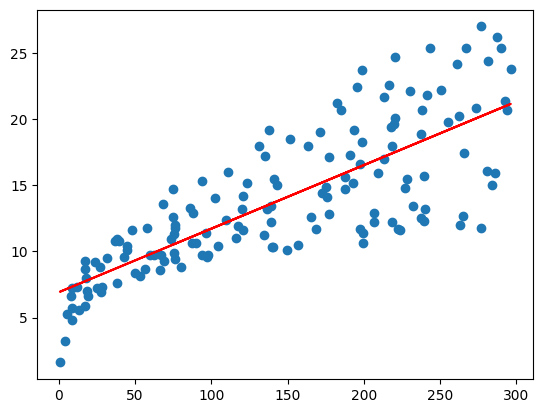

In [71]:
# Visualization: Regression Line (Train data)
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), 'r')

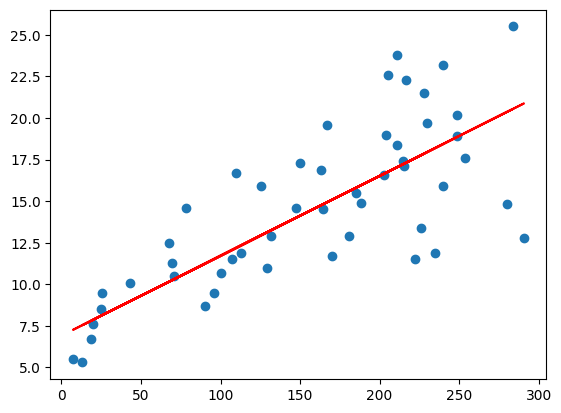

In [72]:
# Visualization: Regression Line (Test data)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')

#7. Model Evaluation

In [73]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [74]:
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R²: 0.5590828580007852
MAE: 2.4643080986027908
MSE: 10.310069587813155


#8. Scaling

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [76]:
scaler

StandardScaler()

In [77]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
X_train

array([[ 1.67439213],
       [-0.23539524],
       [-1.42414044],
       [ 0.44667168],
       [ 1.39812637],
       [ 0.25179541],
       [ 0.85820449],
       [-1.3599459 ],
       [ 1.0141055 ],
       [-1.15360633],
       [-0.05083596],
       [-0.04968963],
       [-1.58462677],
       [ 1.71909903],
       [ 1.57924666],
       [-1.54679785],
       [-0.72717122],
       [-0.06573826],
       [ 0.95793528],
       [-1.28543439],
       [ 1.36488277],
       [ 0.80088794],
       [ 1.65031918],
       [-1.51240792],
       [-1.4413354 ],
       [ 0.75618103],
       [-1.37370188],
       [-0.77073179],
       [ 1.22961572],
       [-0.02676301],
       [ 0.50628089],
       [-0.10700617],
       [ 1.10237298],
       [ 0.92125269],
       [-0.78104877],
       [-0.52885596],
       [-0.78334144],
       [-1.55023684],
       [ 0.54410981],
       [ 0.36069686],
       [-0.09668919],
       [ 1.41302867],
       [-0.66412302],
       [-0.04739696],
       [ 0.31713628],
       [ 0

In [79]:
X_test

array([[ 0.76993701],
       [ 0.67479154],
       [-0.54948992],
       [ 1.56549069],
       [ 1.26285931],
       [ 1.60446594],
       [ 0.2254298 ],
       [ 0.42603772],
       [-0.83721899],
       [ 0.82266823],
       [ 0.23918577],
       [-0.85326762],
       [ 0.81464391],
       [-0.38785726],
       [ 0.94188665],
       [-0.20559064],
       [-0.13681078],
       [ 1.68585544],
       [-1.35306792],
       [ 0.76879067],
       [-0.49561237],
       [-0.86931626],
       [-1.35879957],
       [-0.4153692 ],
       [-0.352321  ],
       [ 0.51315887],
       [-1.15246   ],
       [ 1.20554277],
       [ 0.26555139],
       [ 1.10581197],
       [ 1.10351931],
       [ 1.04161744],
       [ 0.06952879],
       [ 0.30452664],
       [ 1.20095744],
       [ 0.47303729],
       [ 0.9029114 ],
       [-0.16317639],
       [ 0.83871686],
       [-1.42184778],
       [-1.49635929],
       [-0.61024546],
       [-1.43216475],
       [ 0.69313283],
       [-1.56284648],
       [ 0

#9. Re-training After Scaling

In [80]:
model = LinearRegression()
model

LinearRegression()

In [81]:
model.fit(X_train, y_train)

LinearRegression()

In [82]:
# Predictions again
y_pred = model.predict(X_test)

#10. Final Evaluation

In [83]:
# Re-evaluate model
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R²: 0.5590828580007849
MAE: 2.4643080986027908
MSE: 10.310069587813157
